In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('House_price_prediction1.csv')

In [3]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,10-05-2022 00:00,165000.0,3.0,1.0,1150.0,19200.0,1.0,0.0,0.0,4.0,1150.0,0.0,1908.0,0.0,36255 52nd Ave S,Auburn,WA 98001,USA
1,10-05-2022 00:00,239950.0,3.0,1.0,1900.0,33888.0,1.5,0.0,0.0,4.0,1900.0,0.0,1942.0,1982.0,36400-36452 51st Ave S,Auburn,WA 98001,USA
2,10-05-2022 00:00,415000.0,2.0,1.0,1050.0,60113.0,1.0,0.0,0.0,4.0,1050.0,0.0,1943.0,0.0,3720 S 312th Ln,Auburn,WA 98001,USA
3,10-05-2022 00:00,270000.0,2.0,1.0,1780.0,81021.0,1.0,0.0,3.0,4.0,1780.0,0.0,1954.0,1979.0,36816 55th Ave S,Auburn,WA 98001,USA
4,10-05-2022 00:00,100000.0,2.0,1.0,910.0,22000.0,1.0,0.0,0.0,3.0,910.0,0.0,1956.0,2001.0,138 Seattle Blvd S,Algona,WA 98001,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3.498000e+03,3498.000000,3498.000000,3498.000000,3.498000e+03,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,5.343171e+05,3.370783,1.992639,2019.826186,1.577526e+04,1.347341,0.007433,0.259005,3.588622,1665.708977,354.117210,1959.739565,941.224986
std,6.070196e+05,0.923449,0.740418,880.143600,3.641985e+04,0.459538,0.085905,0.802367,0.720036,751.996598,474.075622,25.434928,997.428781
min,0.000000e+00,0.000000,0.000000,370.000000,7.790000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.049250e+05,3.000000,1.500000,1410.000000,6.000000e+03,1.000000,0.000000,0.000000,3.000000,1140.000000,0.000000,1944.000000,0.000000
50%,4.495000e+05,3.000000,2.000000,1890.000000,8.250000e+03,1.000000,0.000000,0.000000,3.000000,1470.000000,0.000000,1963.000000,0.000000
75%,6.300000e+05,4.000000,2.500000,2460.000000,1.204700e+04,2.000000,0.000000,0.000000,4.000000,2000.000000,700.000000,1980.000000,2000.000000
max,2.659000e+07,9.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7680.000000,4820.000000,1998.000000,2014.000000


In [5]:
df.isnull().sum()

date             1102
price            1102
bedrooms         1102
bathrooms        1102
sqft_living      1102
sqft_lot         1102
floors           1102
waterfront       1102
view             1102
condition        1102
sqft_above       1102
sqft_basement    1102
yr_built         1102
yr_renovated     1102
street           1102
city             1102
statezip         1102
country          1102
dtype: int64

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_10932\3746533019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


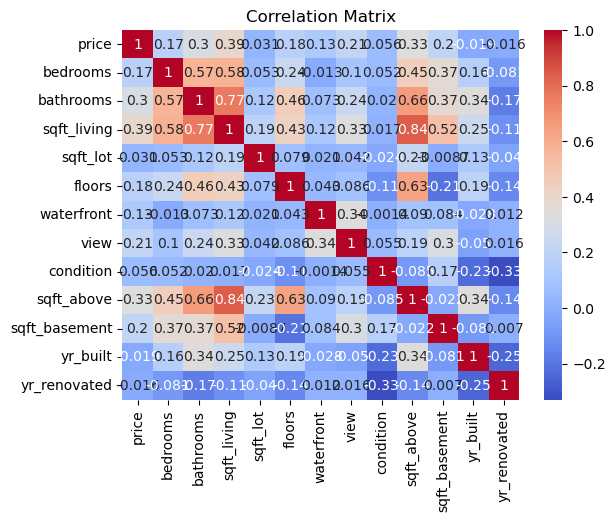

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Preprocessing: Selecting features and target variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a mask to identify rows with missing values in y_train
mask = np.isnan(y_train)

# Apply the mask to both X_train and y_train to remove rows with missing values
X_train_filtered = X_train[~mask]
y_train_filtered = y_train[~mask]

# Create and fit the Linear Regression model on the filtered data
model = LinearRegression()
model.fit(X_train_filtered, y_train_filtered)


LinearRegression()

In [10]:
# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train to learn the imputation statistics
imputer.fit(X_train)

# Transform both X_train and X_test to replace missing values
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Make predictions using the model
y_pred = model.predict(X_test_imputed)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# Remove rows with missing target values from both X_test and y_test
X_test_clean = X_test[~np.isnan(y_test)]
y_test_clean = y_test[~np.isnan(y_test)]

# Make predictions using the model
y_pred = model.predict(X_test_clean)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_clean, y_pred)
rmse = mean_squared_error(y_test_clean, y_pred, squared=False)
mae = mean_absolute_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 74272490394.33916
Root Mean Squared Error: 272529.79725956416
Mean Absolute Error: 177889.57968021903
R-squared: 0.4998868693604299


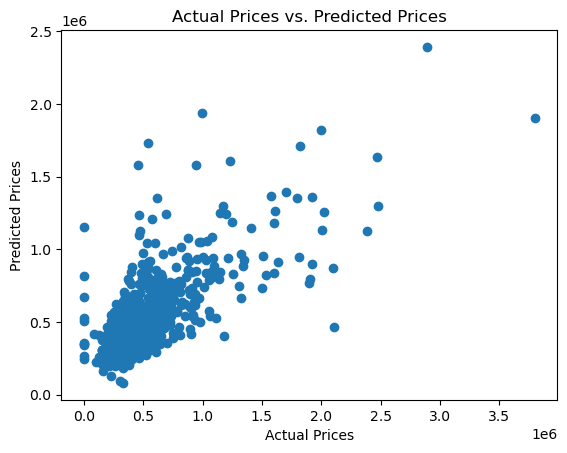

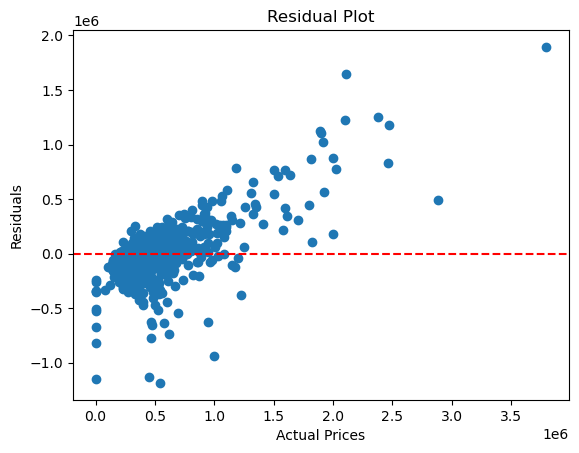

Predicted Price: 379463.8670415736


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
plt.scatter(y_test_clean, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test_clean - y_pred
plt.scatter(y_test_clean, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])